# Supervised Learning - Building a Student Performace Prediction System


# Classification vs. Regression
The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

# Logistic Regression

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Question 1 - Exploring the Data (0.5 points)
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [447]:
##Import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Read the students-data.csv file.
students_data = pd.read_csv("students-data.csv", delimiter=";")
students_data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


# Question 2 - drop missing values (0.5 points)
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*
*Use .dropna() function to drop the NAs*

#### Answer:

In [448]:
students_data.index.name = 'number'
students_data.head(10)

print("Number of rows before dropping na = ", students_data.school.size)

students_data.dropna()

print("Number of rows after dropping na = ", students_data.school.size)

Number of rows before dropping na =  395
Number of rows after dropping na =  395


# Transform Data

## Question 3 (0.5 points)

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [449]:
print("Data types of the frame", students_data.dtypes)

print("\nAttribute names which are not numerical\n")
students_data.select_dtypes(exclude=np.number).columns

Data types of the frame school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Attribute names which are not numerical



Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

# Question 4 - Drop variables with less variance (0.5 points)

*Find the variance of each numerical independent variable and drop whose variance is less than 1. Use .var function to check the variance*

In [450]:
print("\nVariance for all numerical columns\n")
print(students_data.var())


for col in students_data.select_dtypes(include=np.number).columns: 
    if students_data[col].var() < 1: 
        del students_data[col]
  
print("\nVariance for all numerical columns\n")
print(students_data.var())


Variance for all numerical columns

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

Variance for all numerical columns

age          1.628285
Medu         1.198445
Fedu         1.184180
goout        1.239388
Walc         1.658678
health       1.932944
absences    64.049541
G1          11.017053
G2          14.148917
G3          20.989616
dtype: float64


#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

# Question 6 - Encode all categorical variables to numerical (0.5 points)

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [451]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for col in students_data.columns:
    if(students_data[col].dtype == 'object'):
        students_data[col] = le.fit_transform(students_data[col])

# Question 7 - Convert the continuous values of grades into classes (1 point)

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [452]:
students_data['G1'] = np.where(students_data["G1"] >= 10, 1, 0)
students_data['G2'] = np.where(students_data["G2"] >= 10, 1, 0)
students_data['G3'] = np.where(students_data["G3"] >= 10, 1, 0)

students_data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1
5,0,1,16,1,1,1,4,3,3,2,...,1,1,0,2,2,5,10,1,1,1
6,0,1,16,1,1,1,2,2,2,2,...,1,1,0,4,1,3,0,1,1,1
7,0,0,17,1,0,0,4,4,2,4,...,1,0,0,4,1,1,6,0,0,0
8,0,1,15,1,1,0,3,2,3,2,...,1,1,0,2,1,1,0,1,1,1


# Question 8 (0.5 points)

*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate feature and target attributes into separate dataframes with X and y variable names.*

In [453]:
# Target is G3
y = students_data["G3"]
students_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'goout',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [454]:
X = students_data.iloc[:, :students_data.columns.size - 1]
X.head(10)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,1,0,0,4,1,3,6,0,0
1,0,0,17,1,0,1,1,1,0,2,...,0,1,1,0,3,1,3,4,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,1,0,2,3,3,10,0,0
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,1,2,1,5,2,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,1,0,0,2,2,5,4,0,1
5,0,1,16,1,1,1,4,3,3,2,...,1,1,1,0,2,2,5,10,1,1
6,0,1,16,1,1,1,2,2,2,2,...,1,1,1,0,4,1,3,0,1,1
7,0,0,17,1,0,0,4,4,2,4,...,1,1,0,0,4,1,1,6,0,0
8,0,1,15,1,1,0,3,2,3,2,...,1,1,1,0,2,1,1,0,1,1


# Question 9 - Training and testing data split (0.5 points)

# *So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [455]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=300/students_data.G1.size, random_state=50)
print("\nNumber of training records = ", X_train.G1.size)
print("\nNumber of test records = ", X_test.G1.size)


Number of training records =  300

Number of test records =  95


/opt/apps/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Question 10 - Model Implementation and Testing the Accuracy (0.5 points)

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*
#### Answer:

In [456]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()
logReg.fit(X_train, y_train)

/opt/apps/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [457]:
y_pred = logReg.predict(X_test)
print('Accuracy of logistic regression classifier on test data: {:.2f}'.format(logReg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test data: 0.94


# Question 11 - Print the intercept of the Logistic regression model (0.5 points)

The value of the intercepts are stored in the model itself. You can use .intercept_ function to do the same

In [458]:
print("\nIntercept value = ", logReg.intercept_)


Intercept value =  [0.51710331]


# Question 12 - Print the coefficients of the model (0.5 points) and name the coefficient which has the highest impact on the dependent variable (0.5 points)

Hint: Use .coef_ to get the coefficients and use pd.Dataframe to store the coefficients in a dataframe with column names same as the independent variable dataframe

In [459]:
coef_df = pd.DataFrame(data=logReg.coef_, columns=students_data.columns[:students_data.columns.size - 1])

In [460]:
print("\nCoefficients\n")
coef_df.T.sort_values(by = 0, ascending = False)


Coefficients



,0
G2,3.817735
G1,1.267585
higher,0.669181
Walc,0.475202
internet,0.422573
guardian,0.228771
Medu,0.209750
nursery,0.169828
reason,0.099117
Fjob,0.094966


# Question 13 - Predict the dependent variable for both training and test dataset (0.5 points)

Accuracy score() should help you to print the accuracies

In [461]:
y_pred_training_data = logReg.predict(X_train)
print('Accuracy of logistic regression classifier on training data: {:.2f}'.format(logReg.score(X_train, y_train)))

Accuracy of logistic regression classifier on training data: 0.92


In [462]:
y_pred_test_data = logReg.predict(X_test)
print('Accuracy of logistic regression classifier on test data: {:.2f}'.format(logReg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test data: 0.94


# Information about the dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Attribute Information
1. ID - ID number of the image
2. Clump Thickness - 1 to 10
3. Cell Size - 1 to 10
4. Cell Shape - 1 to 10
5. Marginal Adhesion - 1 to 10
6. Single Epethelial cell size - 1 to 10
7. Bare nuclei - 1 to 10 
8. Normal Nucleoli - 1 to 10
9. Bland Chromatin - 1 to 10
10. Mitosis - 1 to 10
 
Class - Dependent Variable - 2 for benign 4 for malignant

### Read the data given in bc2.csv file

In [463]:
bc_data = pd.read_csv("bc2.csv")
bc_data.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


### Observe the no.of records in dataset and type of each feature 

In [464]:
print("\nTotal number of records in the dataset = ", bc_data.ID.size)

print("\nData type of each feature\n", bc_data.dtypes)


Total number of records in the dataset =  699

Data type of each feature
 ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object


### Use summary statistics to check if missing values, outlier and encoding treament is necessary


In [465]:
print("\nSummary statistics are provided below\n")
bc_data.describe().T


Summary statistics are provided below



,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


### Check Missing Values

In [466]:
print("Looking at the counts above, there are no missing values")

bc_data.isna().head()
bc_data.isnull().head()

Looking at the counts above, there are no missing values


,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


### Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [467]:
top_value = bc_data.describe(include="all")["Bare Nuclei"].top

print("\n? values in Bare Nuclei\n")
print(bc_data.loc[bc_data["Bare Nuclei"] == "?"])

bc_data.loc[bc_data["Bare Nuclei"] == "?", "Bare Nuclei"] = top_value

print("\n\nAfter replacing ? with top\n")
print(bc_data.loc[bc_data["Bare Nuclei"] == "?"])



? values in Bare Nuclei

          ID  ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
23   1057013               8          4           5                  1   
40   1096800               6          6           6                  9   
139  1183246               1          1           1                  1   
145  1184840               1          1           3                  1   
158  1193683               1          1           2                  1   
164  1197510               5          1           1                  1   
235  1241232               3          1           4                  1   
249   169356               3          1           1                  1   
275   432809               3          1           3                  1   
292   563649               8          8           8                  1   
294   606140               1          1           1                  1   
297    61634               5          4           3                  1   
315   704168

### Print and plot the distribution of target variable (Class - using Histogram) 

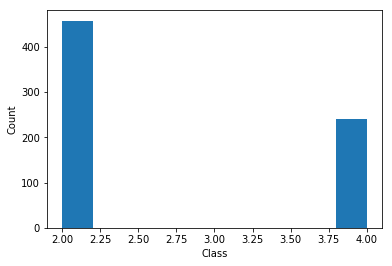

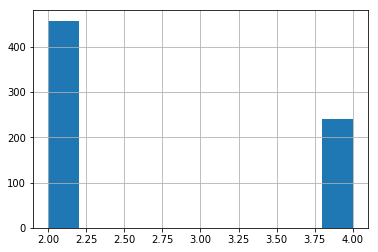

In [468]:
plt.hist(bc_data["Class"].astype(int))
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

bc_data["Class"].astype(int).hist()


### convert the datatype of Bare Nuclei to `int`

In [469]:
bc_data["Bare Nuclei"] = bc_data["Bare Nuclei"].astype(int)

bc_data.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

### Standardization of Data (Use Standard Scaler)

In [470]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit_transform(bc_data)

/opt/apps/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/apps/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.11623873,  0.20693572, -0.69999505, ..., -0.61182504,
        -0.34391178, -0.72539705],
       [-0.1115035 ,  0.20693572,  0.28384518, ..., -0.28411186,
        -0.34391178, -0.72539705],
       [-0.09126525, -0.50386559, -0.69999505, ..., -0.61182504,
        -0.34391178, -0.72539705],
       ...,
       [-0.29657482,  0.20693572,  2.25152563, ...,  2.33759359,
         0.23956962,  1.37855538],
       [-0.28254589, -0.14846494,  1.59563215, ...,  1.02674087,
        -0.34391178,  1.37855538],
       [-0.28254589, -0.14846494,  1.59563215, ...,  0.37131451,
        -0.34391178,  1.37855538]])

### Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them. (Use pd.scatter matrix())

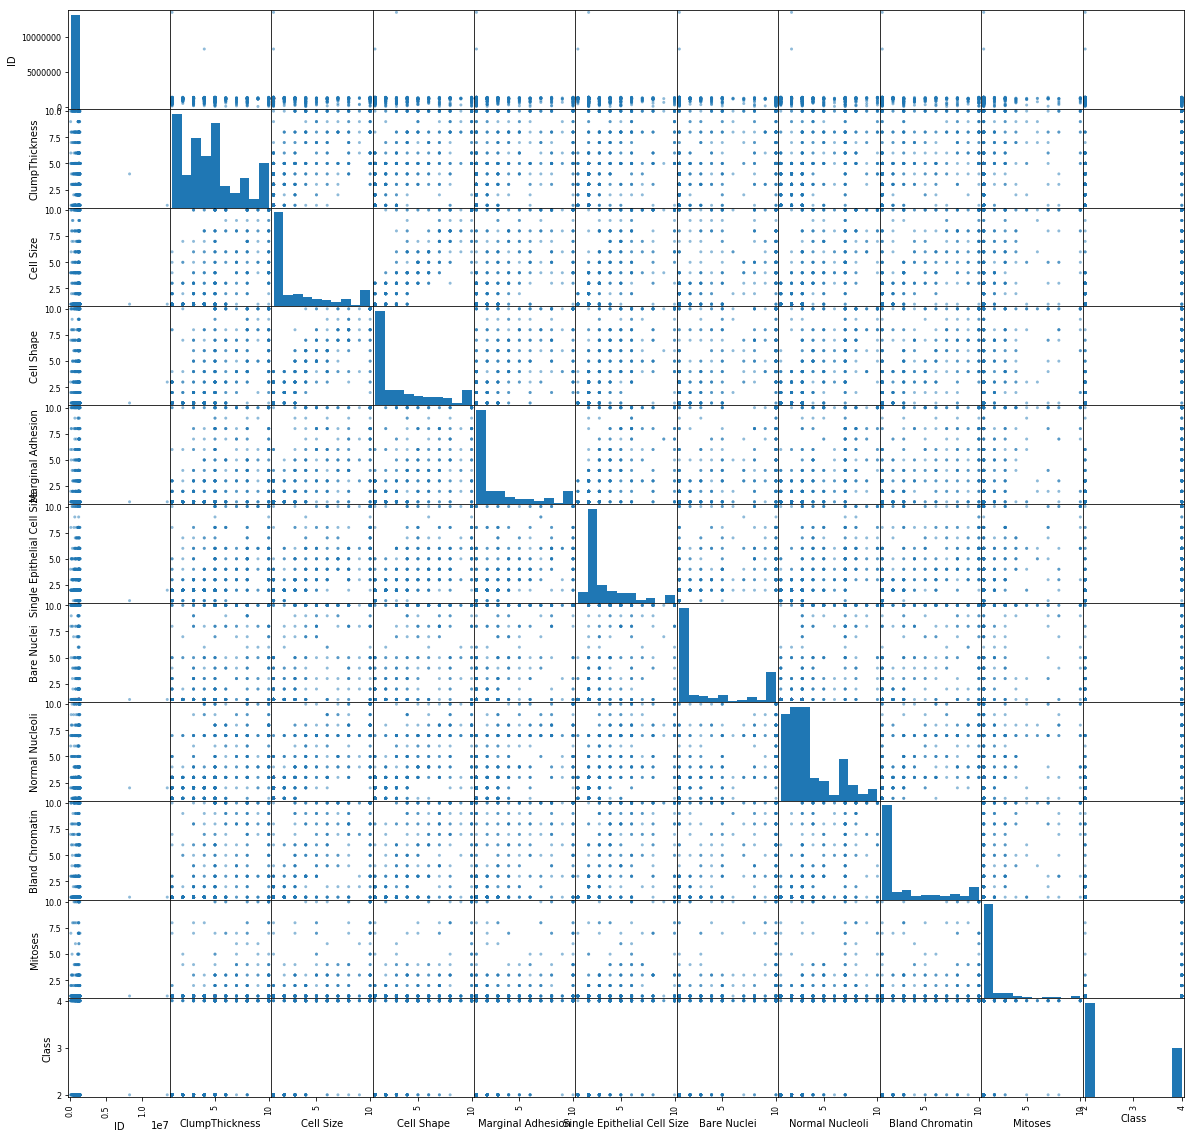

In [471]:
pd.plotting.scatter_matrix(bc_data, figsize=(20, 20))
plt.show()

### Divide the dataset into feature set and target set

In [472]:
X = bc_data.iloc[:, :bc_data.columns.size - 1]
print("\nFeatures\n\n",X.head(10))

# Target is Class
y = bc_data["Class"]
print("\n\n\nTarget\n", y.head(10))




Features

         ID  ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0  1000025               5          1           1                  1   
1  1002945               5          4           4                  5   
2  1015425               3          1           1                  1   
3  1016277               6          8           8                  1   
4  1017023               4          1           1                  3   
5  1017122               8         10          10                  8   
6  1018099               1          1           1                  1   
7  1018561               2          1           2                  1   
8  1033078               2          1           1                  1   
9  1033078               4          2           1                  1   

   Single Epithelial Cell Size  Bare Nuclei  Normal Nucleoli  Bland Chromatin  \
0                            2            1                3                1   
1                            7   

### Divide the Training and Test sets in 70:30 

In [473]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, random_state=50)
print("\nNumber of training records = ", X_train.ID.size)
print("\nNumber of test records = ", X_test.ID.size)


Number of training records =  489

Number of test records =  210


/opt/apps/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Model 1 : Implement a default Decision Tree model with no attributes

In [474]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=7)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Check the feature importances of the Decision Tree model

In [475]:
train_char_label = ['No', 'Yes']

from IPython.display import Image  
from sklearn import tree
from os import system

Class_Tree_File = open('/tmp/class_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Class_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Class_Tree_File.close()


# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                                  Imp
ID                           0.013889
ClumpThickness               0.077170
Cell Size                    0.664964
Cell Shape                   0.012387
Marginal Adhesion            0.036821
Single Epithelial Cell Size  0.008914
Bare Nuclei                  0.063082
Normal Nucleoli              0.086873
Bland Chromatin              0.035900
Mitoses                      0.000000


### Check the training & test accuracy of model 1 

In [476]:
y_test_predict = dt_model.predict(X_test)
print(dt_model.score(X_train , y_train))
print(dt_model.score(X_test , y_test))

0.9979550102249489
0.9333333333333333


### Model 2: Implement a decision tree with depth of the tree = 10 and leaf nodes = 5

In [477]:
dt_model2 = DecisionTreeClassifier(criterion="entropy", max_depth=10, max_leaf_nodes=5)
dt_model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Check the training & test accuracy of model 2

In [478]:
y_test_predict = dt_model2.predict(X_test)
print(dt_model2.score(X_train , y_train))
print(dt_model2.score(X_test , y_test))

0.9406952965235174
0.8952380952380953


### Print the confusion matrix of model 1 and model 2

In [482]:
from sklearn import metrics
print("\nConfusion matrix for model 1\n")
print(metrics.confusion_matrix(y_test, y_predict))
print("\n\nConfusion matrix for model 2\n")
print(metrics.confusion_matrix(y_test, y_test_predict))


Confusion matrix for model 1

[[129   6]
 [  8  67]]


Confusion matrix for model 2

[[116  19]
 [  3  72]]
